In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [51]:
def move_randomly():
    return 50  + np.random.randn() * 0

def move_to_base(baseDist, teammateDist):
    return 100 - 10 * baseDist + 50 * np.exp(- 0.2 * teammateDist) + np.random.randn() * 0

def attack_enemy(baseDist, enemyDist):
    return (10 - enemyDist) * (100 - 10 * baseDist) + np.random.randn() * 0

In [42]:
BASE_DIST = np.linspace(0, 10, 100) # np.arange(0, 100, 5)
TEAMMATE_DIST = np.linspace(0, 10, 100) # np.arange(0, 100, 5)
ENEMY_DIST = np.linspace(0, 10, 100) # np.arange(0, 100, 5)

img1 = np.zeros((BASE_DIST.shape[0], TEAMMATE_DIST.shape[0]))
img2 = np.zeros((BASE_DIST.shape[0], ENEMY_DIST.shape[0]))

ht1 = np.zeros((4, BASE_DIST.shape[0], TEAMMATE_DIST.shape[0]))
ht2 = np.zeros((4, BASE_DIST.shape[0], ENEMY_DIST.shape[0]))

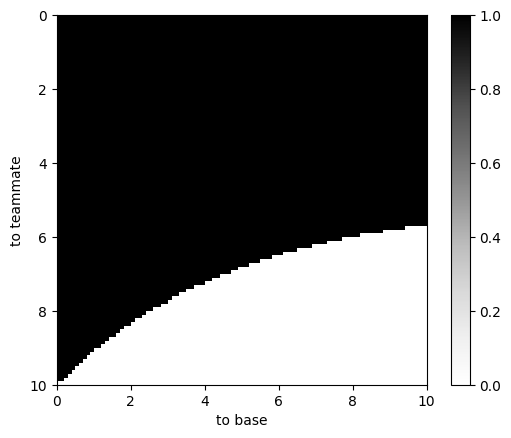

In [56]:
for x, bd in enumerate(BASE_DIST):
    for y, td in enumerate(TEAMMATE_DIST):
        utility = np.array([move_randomly(), move_to_base(bd, td)])
        for i in range(utility.shape[0]):
            ht1[i][x][y] = utility[i]
        img1[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img1, extent=[0, 10, 10, 0], cmap='Greys')
ax.set_xlabel("to base")
ax.set_ylabel("to teammate")
plt.colorbar(im)

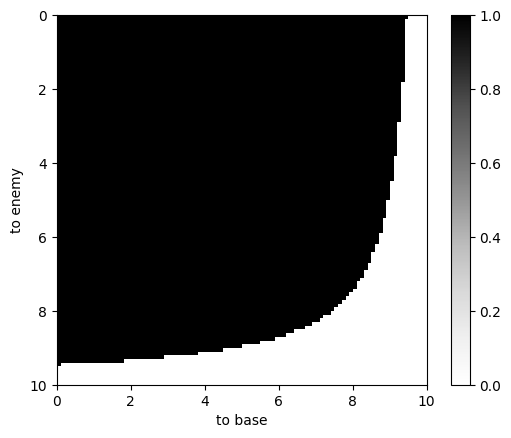

In [57]:
for x, bd in enumerate(BASE_DIST):
    for y, ed in enumerate(ENEMY_DIST):
        utility = np.array([move_randomly(), attack_enemy(bd, ed)])
        for i in range(utility.shape[0]):
            ht2[i][x][y] = utility[i]
        img2[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img2, extent=[0, 10, 10, 0], cmap='Greys')
ax.set_xlabel("to base")
ax.set_ylabel("to enemy")
plt.colorbar(im)